In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

# Reading data and basic stats 

In [2]:
df = pd.read_csv("train.csv")
print("Number of data points:",df.shape[0])

Number of data points: 404290


In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


# Data Cleaning

- Handling NaN values

In [10]:
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [11]:
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# Number of duplicate vs non-duplicate questions

<AxesSubplot:xlabel='is_duplicate'>

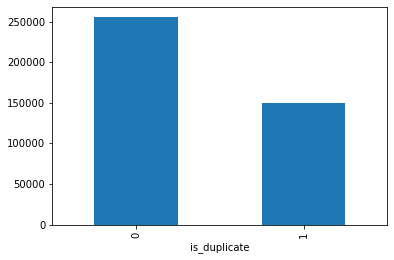

In [4]:
df.groupby("is_duplicate")['id'].count().plot.bar()

In [5]:
print('is_duplicate = 0 :\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('is_duplicate = 1 :\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

is_duplicate = 0 :
   63.08%
is_duplicate = 1 :
   36.92%


# Number of unique questions 

In [9]:
q_ids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique = len(np.unique(q_ids))
repeated = np.sum(q_ids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique))
print ('Number of unique questions that appear more than one time: {} \n'.format(repeated))

q_vals=q_ids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 



 - Here we can observe one question can be paired up with many other questions

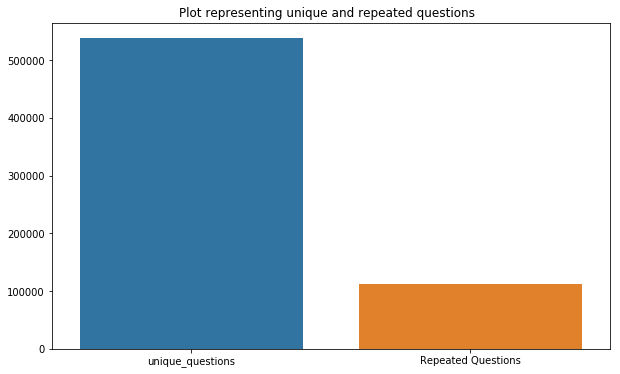

In [ ]:
x = ["Unique" , "Repeated"]
y =  [unique , repeated]

plt.figure(figsize=(10, 6))
sns.barplot(x,y)
plt.show()